#  Logistic Regression

In [3]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Exploration

In [4]:
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# checking for null values in the df

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# deleting columns which have no use for prediction like "Name"

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df1 = df.drop('Name', axis=1)
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# deleting 'Ticket' column as well since there are seperate columns for ticket class and fare making ticket number useless
df1 = df1.drop('Ticket', axis=1)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


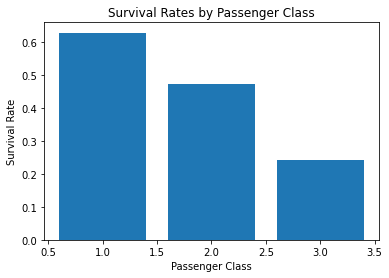

In [6]:
#grouping pclass and survived
survival_rates = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_rates.index, survival_rates.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class')
plt.show()

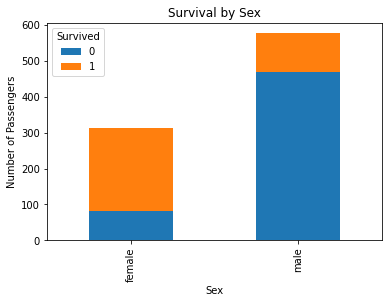

In [12]:
# survival based on sex
survived_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()

survived_by_sex.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Survival by Sex')
plt.legend(title='Survived')
plt.show()

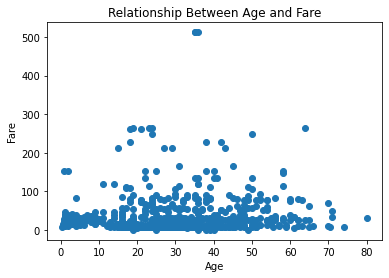

In [13]:
#relatiuonship between age and fare

plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship Between Age and Fare')
plt.show()

# 2. Data Preprocessing

In [14]:
# checking for missing values
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# dropping rows where embarked value is missing since its insignificant amount of rows

df1 = df1.dropna(subset=['Embarked'])
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
# exploring age column 

df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


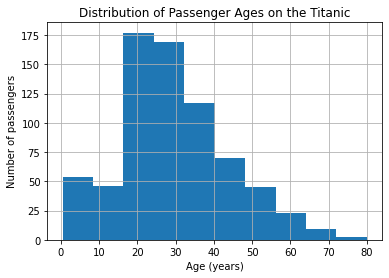

In [18]:
# plotting histogram for age column 

plt.hist(df1['Age'])
plt.xlabel('Age (years)')
plt.ylabel('Number of passengers')
plt.title('Distribution of Passenger Ages on the Titanic')
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()

In [19]:
# filling missing values in age column with mean
df1['Age'].fillna(df['Age'].mean(), inplace=True)
df1.isnull().sum()

C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
# dropping cabin column as it wont influence outcome and also has a significant amount of missing values

df1 = df1.drop('Cabin', axis=1)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [21]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [22]:
df1['Sex'].nunique()

2

In [23]:
df2 = df1.copy()
df2['Age'] = df2['Age'].astype(int)
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [24]:
df2['Fare'] = df2['Fare'].astype(int)
df2.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Sex            object
Age             int32
SibSp           int64
Parch           int64
Fare            int32
Embarked       object
dtype: object

In [25]:
df1['Embarked'].nunique()

3

In [26]:
#Creating dummy variables for 'Embarked' and 'Sex'
df2 = pd.get_dummies(df2, columns=['Embarked', 'Sex'], drop_first=True)
df2.dtypes # Setting drop_first=True ensures that one category is dropped from each new dummy variable set to avoid multicollinearity issues in logistic regression models

PassengerId    int64
Survived       int64
Pclass         int64
Age            int32
SibSp          int64
Parch          int64
Fare           int32
Embarked_Q     uint8
Embarked_S     uint8
Sex_male       uint8
dtype: object

# 3. Model Building

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
X = df2.drop('Survived', axis=1)
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 4. Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve


In [31]:
y_pred = model.predict(X_test)

In [32]:
# Calculating accuracy, precision, recall, F1-score, and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc)


Accuracy: 0.797752808988764
Precision: 0.7323943661971831
Recall: 0.7536231884057971
F1-Score: 0.7428571428571428
AUC-ROC: 0.7896556309001462


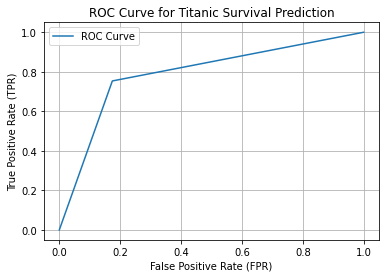

In [33]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Titanic Survival Prediction')
plt.grid(True)
plt.legend()
plt.show()


# 5. Interpretation

In [34]:
coefficients = model.coef_
odds_ratios = np.exp(coefficients)
print(odds_ratios)

[[1.00082537 0.76002517 0.98530182 0.83007226 0.78425328 1.01319794
  1.14256084 1.10526462 0.07086519]]


Positive Coefficient: higher values of that feature are more likely to be associated with survival.
Negative Coefficient: Higher values of that feature are likely linked to a lower chance of survival.

# 6. Deployment with Streamlit

In [35]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [36]:
import streamlit as st
model = joblib.load('logistic_regression_model.pkl')

In [37]:
# Function to make predictions
def predict_survival(Pclass, Age, SibSp, Parch, Fare, Sex, Embarked):
    data = np.zeros((1, 9))
    data[0, 0] = Pclass
    data[0, 1] = Age
    data[0, 2] = SibSp
    data[0, 3] = Parch
    data[0, 4] = Fare
    data[0, 5] = Sex  

    if Embarked == 0:  # 'C'
        data[0, 6] = 1
    elif Embarked == 1:  # 'Q'
        data[0, 7] = 1
    else:  # 'S'
        data[0, 8] = 1

    prediction = model.predict(data)
    return prediction[0]

In [38]:
st.title('Titanic Survival Prediction')
st.header('Enter passenger details:')
Pclass = st.selectbox('Passenger Class', [1, 2, 3])
Age = st.slider('Age', 0, 80, 30)
SibSp = st.slider('Number of Siblings/Spouses aboard', 0, 8, 0)
Parch = st.slider('Number of Parents/Children aboard', 0, 6, 0)
Fare = st.slider('Fare', 0, 500, 50)
Sex = st.selectbox('Sex', ['male', 'female'])
Embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

2024-05-16 11:13:51.137 WARNING root: 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [39]:
# Encode categorical features
Sex = 1 if Sex == 'male' else 0
Embarked = {'C': 0, 'Q': 1, 'S': 2}[Embarked]

In [40]:
if st.button('Predict'):
    result = predict_survival(Pclass, Age, SibSp, Parch, Fare, Sex, Embarked)
    if result == 1:
        st.success('The passenger is likely to survive.')
    else:
        st.error('The passenger is not likely to survive.')

1.Difference between precision and recall
* precision = it focuses on the accuracy of positive prdeiction
* recall = focuses on models ability to find all positive instances

precision = TP/(TP+FP)

recall = TP/(TP+FN)

2. cross validation


It partition the dataset into a set of training and testing k times and evaluates the model
* it splits the data into k equal sized dataset
* trains the model k times dividing it into k-1 for training and remaining for testing